In [1]:
#Import Package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

In [2]:
#Loading Forms
#Ignore Lines Starting With #
#Ensure You Put This File With Your Excels/CSVs... In One Folder
#Change the forms' names to yours and then just need to run the program!
df_week = pd.read_csv("userbeha_01142024-01202024.csv",comment="#")
df_month = pd.read_csv("userbeha_12152023-01132024.csv",comment="#")
df_halfyear = pd.read_csv("userbeha_07152023-01132024.csv",comment="#")

In [3]:
#Preview Data
print(df_week.head())#5 rows as default
print(df_month.head())
print(df_halfyear.head())

        Event name  Event count  Total users  Event count per user  \
0        page_view         3785         1243              3.135874   
1  user_engagement         2987          877              3.501758   
2    session_start         1426         1261              1.178512   
3           scroll         1117          484              2.327083   
4      first_visit         1103         1103              1.000000   

   Total revenue  
0              0  
1              0  
2              0  
3              0  
4              0  
        Event name  Event count  Total users  Event count per user  \
0        page_view        13424         3908              3.460686   
1  user_engagement        10544         3045              3.511156   
2           scroll         5202         2118              2.459574   
3    session_start         4752         3914              1.227273   
4      first_visit         3685         3684              1.000271   

   Total revenue  
0              0  
1     

In [4]:
#Event count; Total users; Event count per user are meaningful here
#Below will be using bar charts & pie charts

In [5]:
#Bar Chart For Three Periods
df_comb = [df_week, df_month, df_halfyear]#Combination of three period's forms
subtitle_comb = ["Last Week", "Last Month", "Last 6 Month"]#Different titles
def barplot_event(column,
                  num=10,#Num determines how many countries on the graph, sorted and get the first num
                  figsize1=20,#Figure width
                  figsize2=20,#Figure height
                  xfont=20,#Xlabel fontsize
                  yfont=20,#Ylabel fontsize
                  labelfont=20,#Label fontsize
                  titlefont=20,#Whole title fontsize
                  legend_1font=20,#Internal legend fontsize
                  subfont=20,#Subtitle fontsize
                  textfont=20,#Text after bar: fontsize
                  legtitle=20#Legend title font size
                  ):#When running functions, lease adjust parameters if you want
    
    #Initialization
    plt.figure(figsize=(figsize1, figsize2))#Set fig size (No need to sort here, due to events' size very small)
    
    #Construction of plots
    for i in range(3):
        #Loop each dataframes and draw them on a same graph
        plt.subplot(3,1,(i+1))#Set subplots: three rows one column
        bars = plt.barh(df_comb[i]["Event name"], df_comb[i][column])#Draw horizontal bar charts and store the results
        # Annotate each bar with the exact value
        for bar in bars:
            value = bar.get_width()#Get the width of the bar (the value that the bar represents)
            plt.text(value, bar.get_y() + bar.get_height()/2,#Place in the middle
                     f'{value}',#Text
                     va='center', ha='left',fontsize=textfont)#Locate text inside
        plt.xlabel(column,fontsize=xfont)#Label X-axis
        plt.ylabel("Event Name",fontsize=yfont)#Label Y-axis
        plt.yticks(df_comb[i]["Event name"],fontsize=labelfont)#Add ticks
        plt.title(subtitle_comb[i],fontsize=titlefont)#Set subtitle
        #Now add a legend
        #Create legend's content by looping
        legend_handles = [Patch(label=f"{name}: {count:.2f} per user")#Legend's content
                          for name, count in (zip(df_comb[i]["Event name"], df_comb[i]["Event count per user"]))]
        #Place the legend outside
        plt.legend(handles=legend_handles, title="Event Count Per User", fontsize=legend_1font, bbox_to_anchor=(1.05, 1),
                   loc='upper left', title_fontsize=legtitle)
    plt.suptitle(f"{column} For Event Name",fontsize=subfont)#Set whole title
    
    #Show
    plt.show()#Display

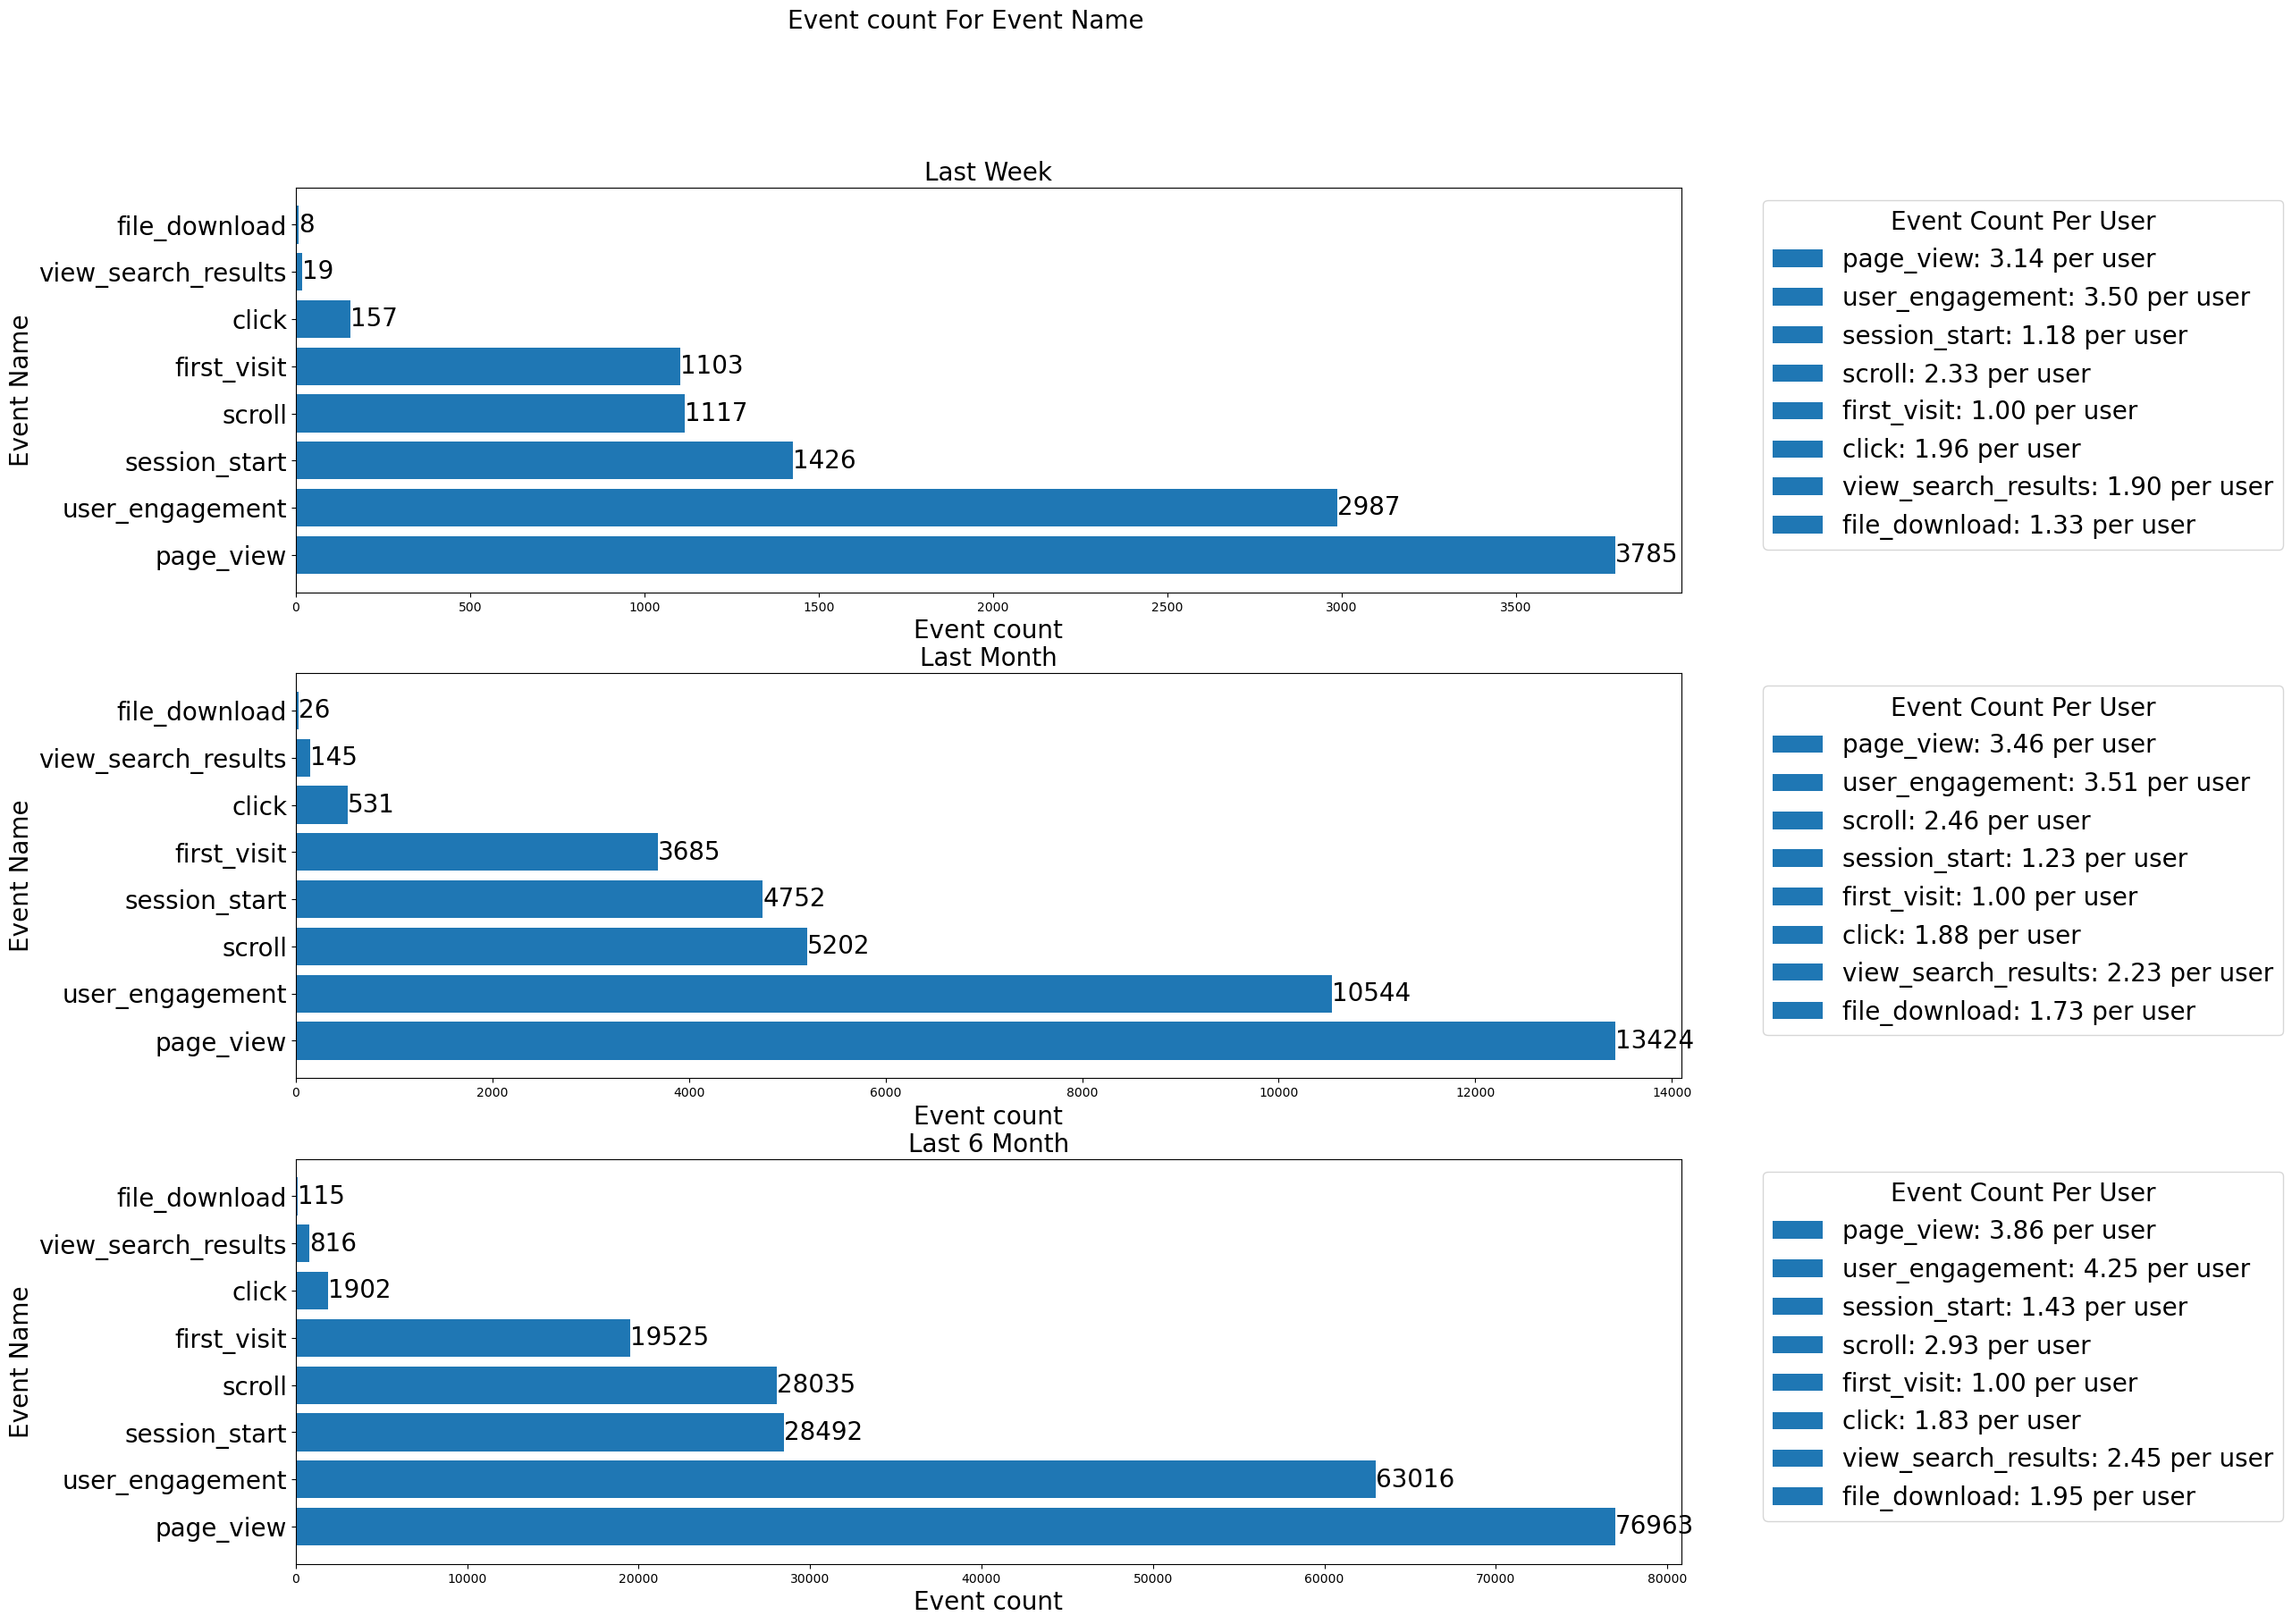

In [6]:
#Event Count
barplot_event("Event count")

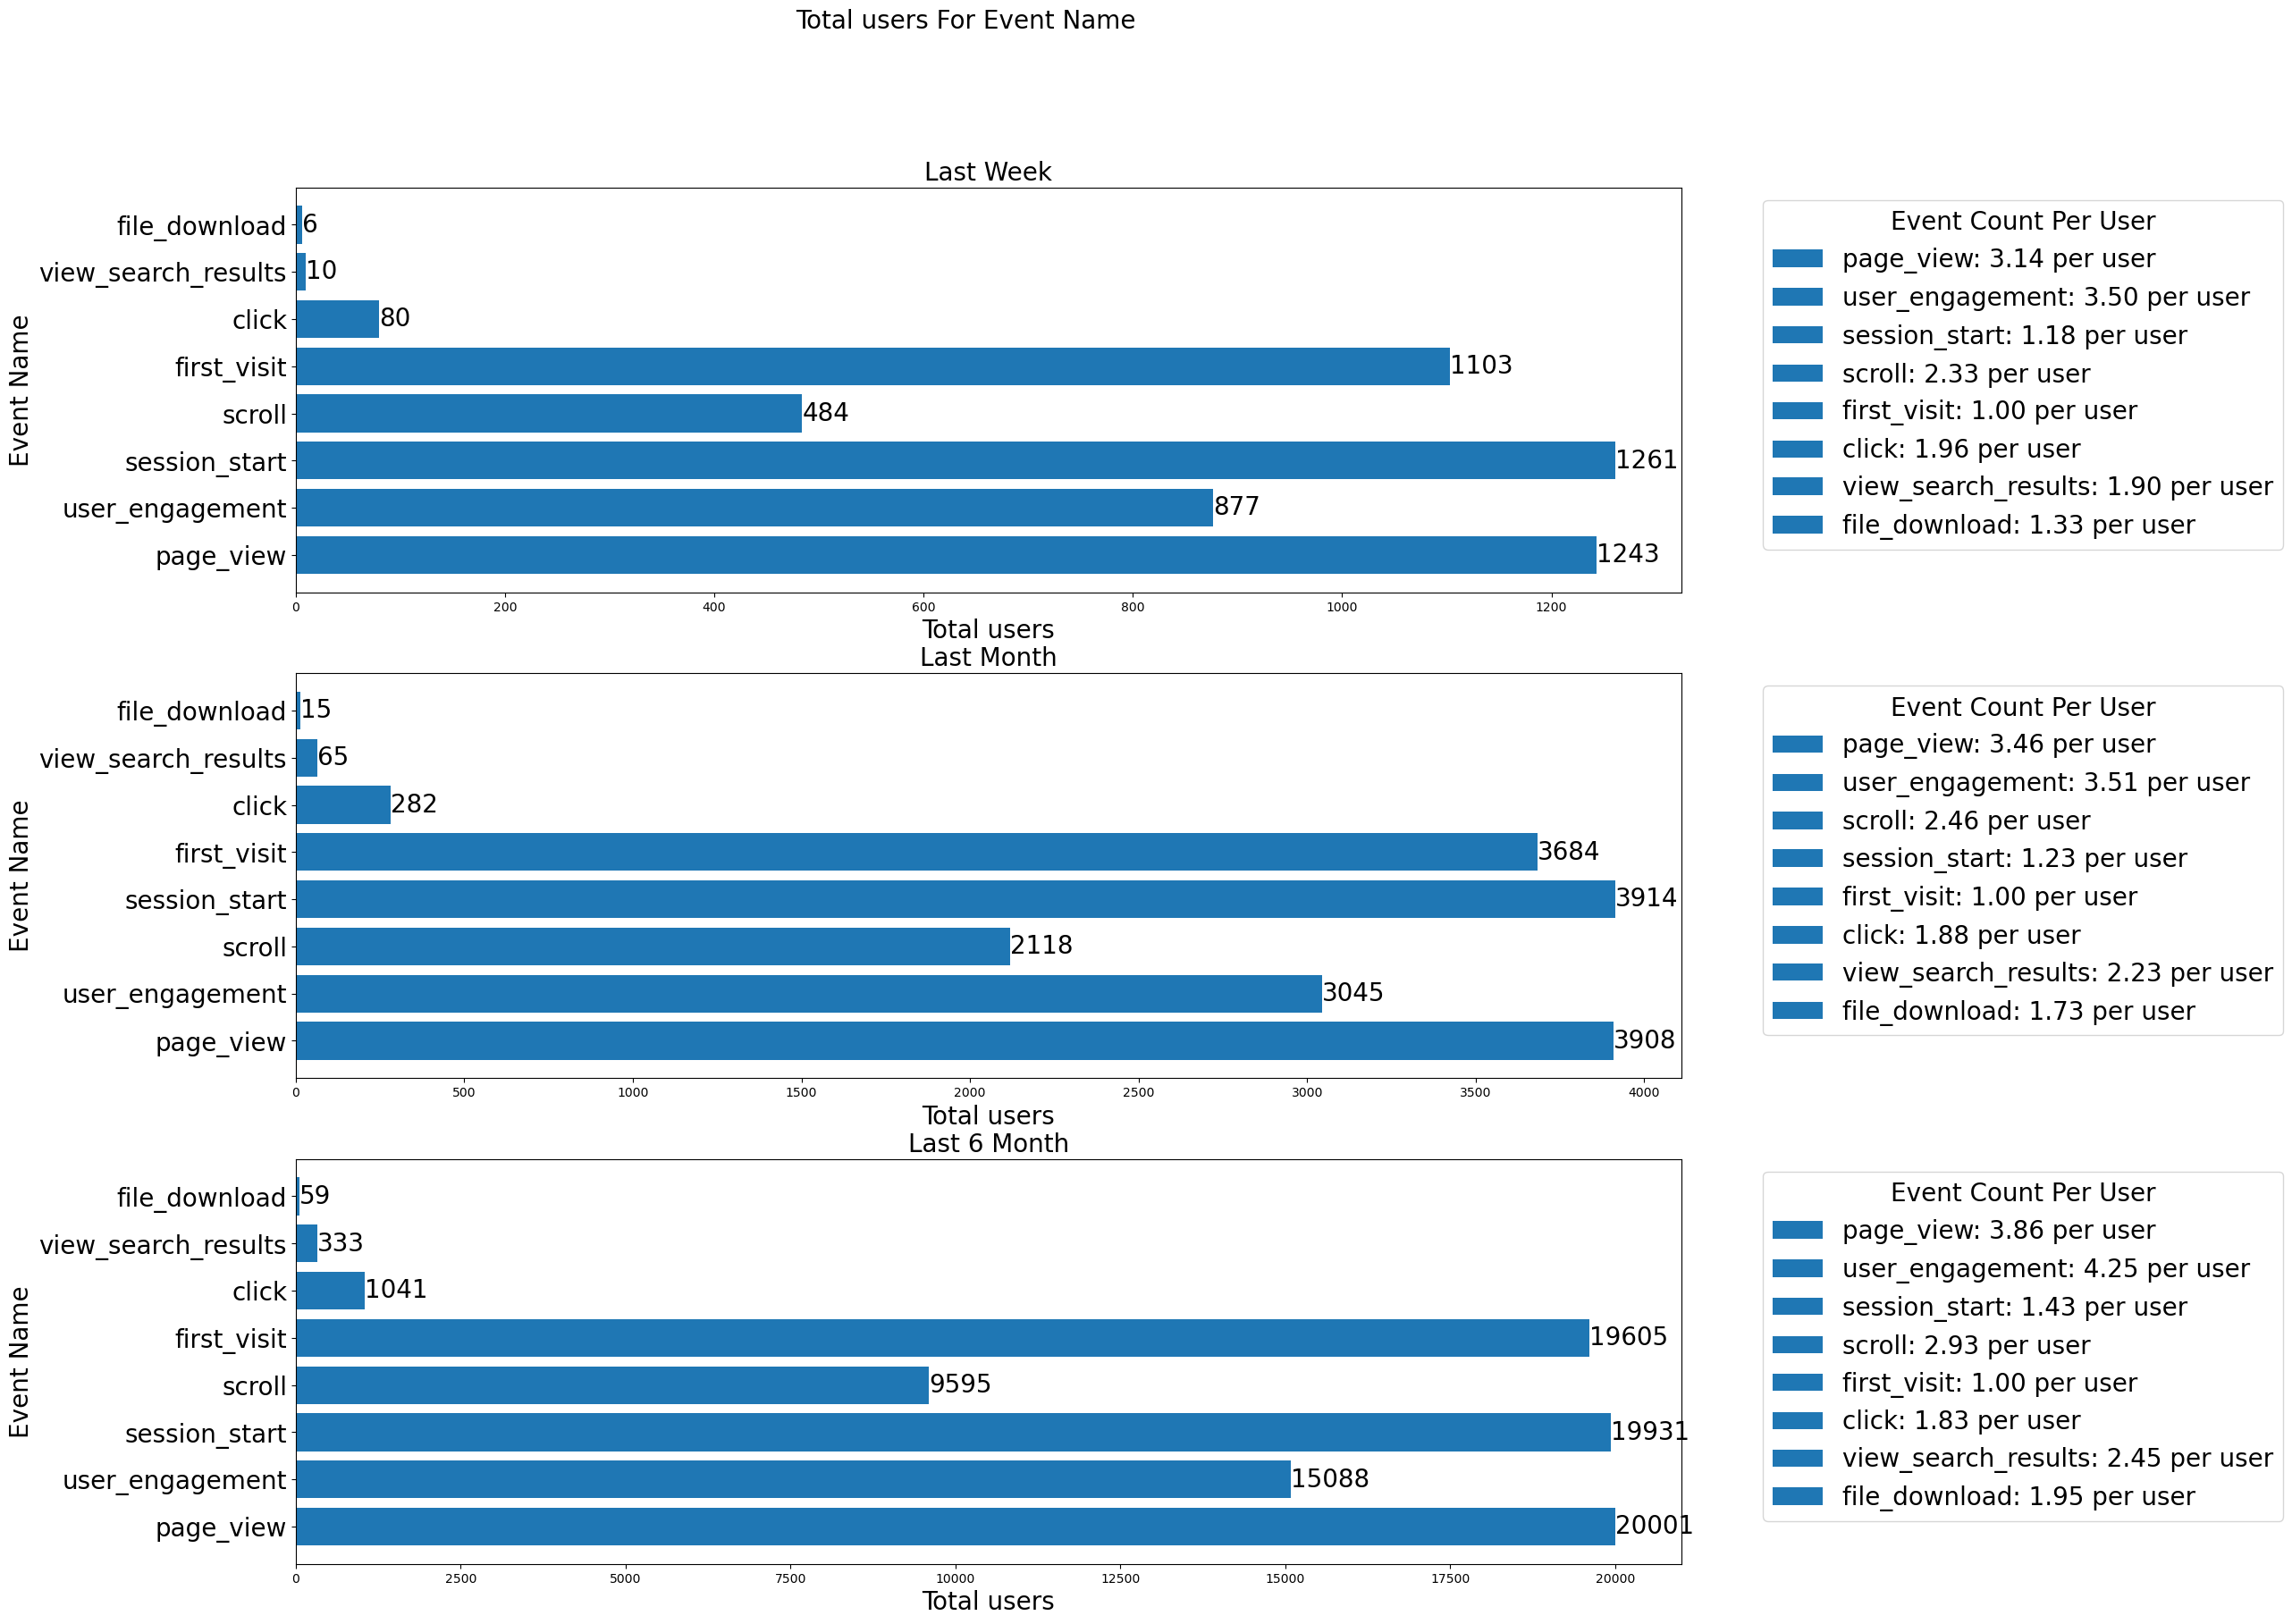

In [7]:
#User Count
barplot_event("Total users")

In [8]:
#Pie Chart For Three Periods
#Note that pie chart is used to show percentages
df_comb = [df_week, df_month, df_halfyear]
subtitle_comb = ["Last Week", "Last Month", "Last 6 Month"]
def pieplot_event(column,
                  figsize1=20,#Figure's width
                  figsize2=20,#Figure's height
                  show=0.05,#Threshold of display of percentage
                  font=10,#Text fontsize, including labels & inside text
                  titlefont=20,#Title fontsize
                  subfont=20,#Subtitle fontsize
                  labeldisplay=5#Threshold to display the first labeldisplay largest's names
                  ):#When running functions, lease adjust parameters if you want
    
    #Initialization
    plt.figure(figsize=(figsize1, figsize2))
    
    # Function to decide whether to display the percentage on the slice
    def autopct_format(values):
        def my_autopct(pct):
            total = sum(values)#Get total, values is a list of value
            val = int(round(pct*total/100.0))#Get percentage
            if val > (total * show):#If the slice is larger than 5% (default) of the total then display the percentage on plot
                return '{p:.2f}%'.format(p=pct)#Round to two decimal places
            else:
                return ''#Do not show label
        return my_autopct
    
    #Construction of plots
    for i in range(3):
        #Sort: make the dimension decreasing
        df = df_comb[i].sort_values(by=column, ascending=False)
        plt.subplot(3,1,(i+1))
        labels_ = df["Event name"]#Labels of pie chart, act as a vector
        labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest
        sizes = df[column]##Get exact values' list, for future text usage
        #We are interested in all now
        #Draw pie chart according to percentage, set label size
        plt.pie(df[column], labels = labels_,textprops={'fontsize': font}, autopct=autopct_format(sizes))#autopct controls text inside
        plt.title(subtitle_comb[i],fontsize=titlefont)
    plt.suptitle(f"{column} For Event Names",fontsize=subfont)
    
    #Show
    plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3276\399713322.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


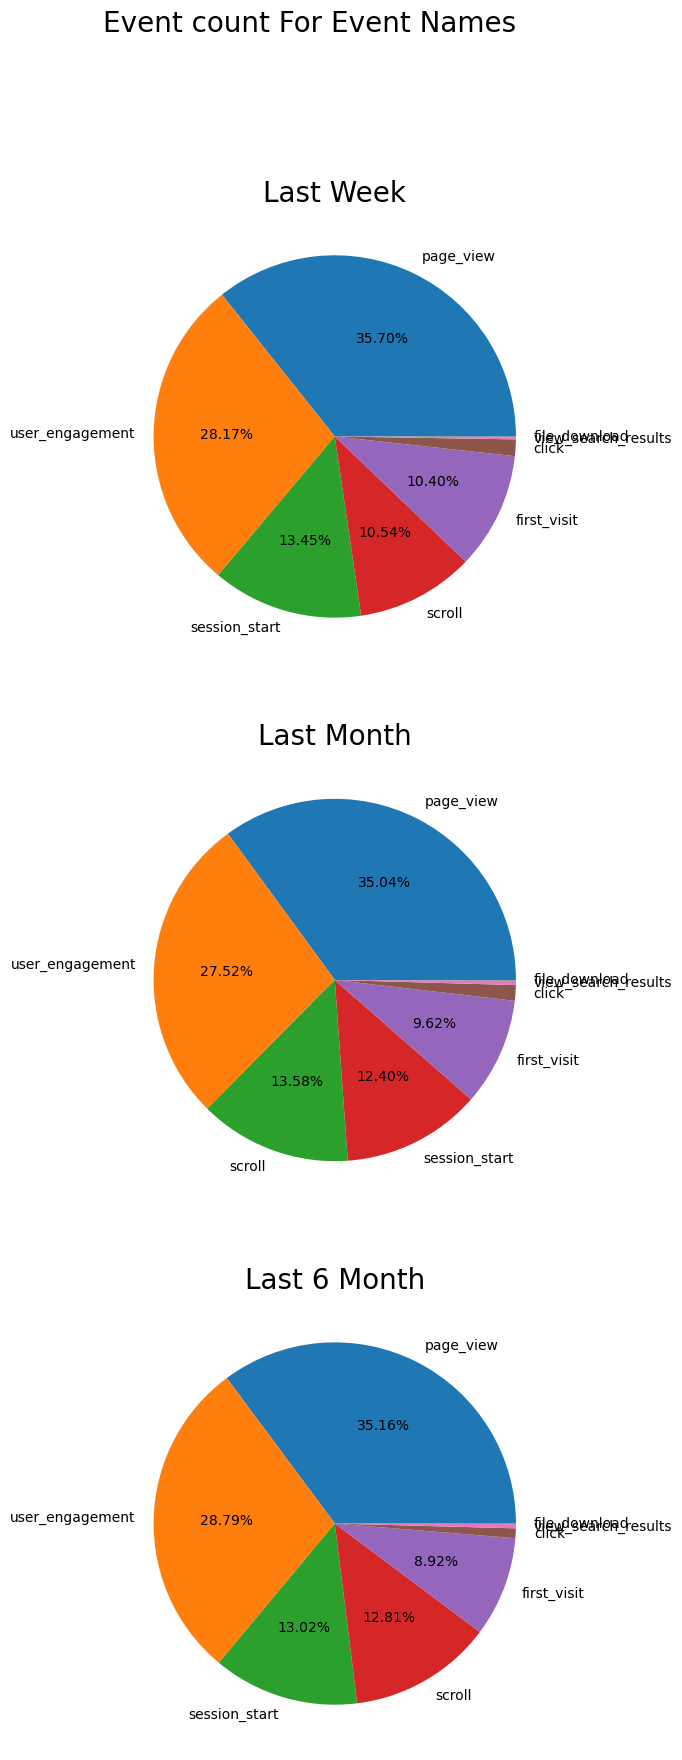

In [9]:
#Event Count: Pieplot
pieplot_event(column="Event count",labeldisplay = 10)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3276\399713322.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


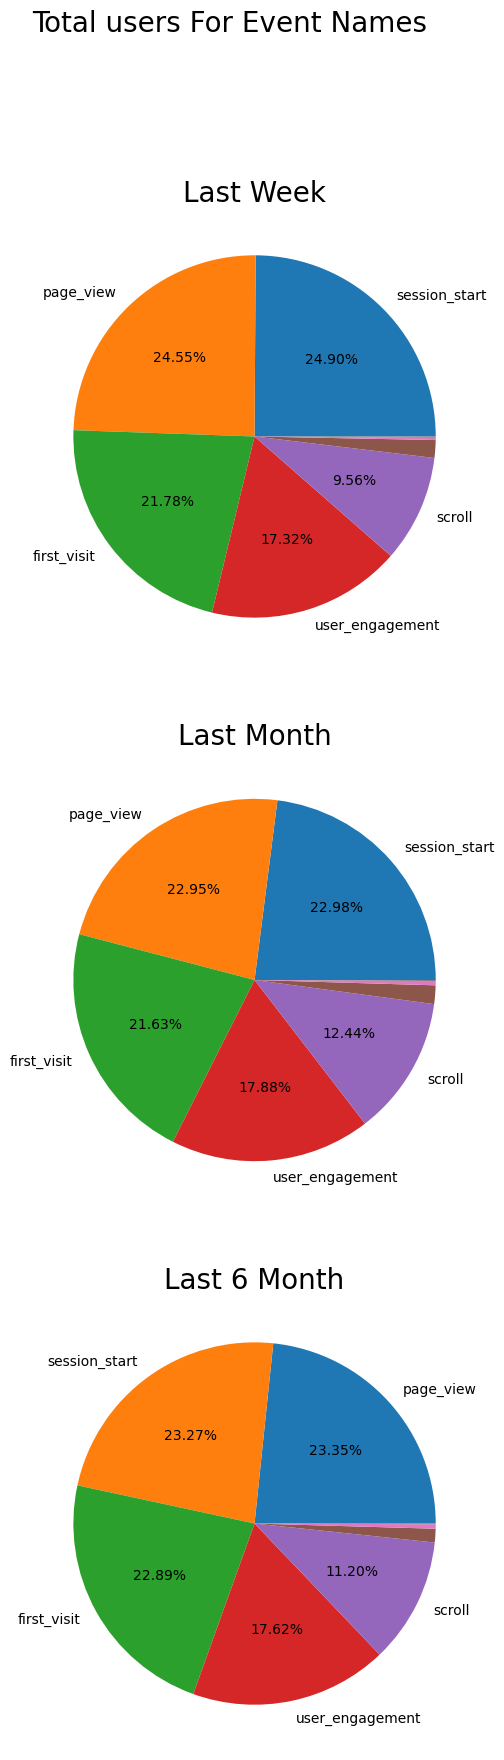

In [10]:
#Event Count: Pieplot
pieplot_event(column="Total users")

In [11]:
#Click File on the topleft, then click Print Preview to show the output, then make screenshots!